In [29]:
%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy
import pickle
import shapely

In [31]:
with open('pickles/featuredb.pickle', 'rb') as f:
    sdf = pickle.load( f)

In [26]:
import os
os.environ['PROJ_LIB'] = '~/miniconda3/envs/ccl/share/proj/'
from mpl_toolkits.basemap import Basemap

In [27]:
def make_patch(polygon, m):
    polygon = shapely.ops.transform(m, polygon)
    path = matplotlib.path.Path(numpy.asarray(polygon.exterior.coords)[:,:2])
    patch = matplotlib.patches.PathPatch(path)
    return patch

In [37]:
sdf.timestamp[0]

Timestamp('2021-01-10 00:00:00')

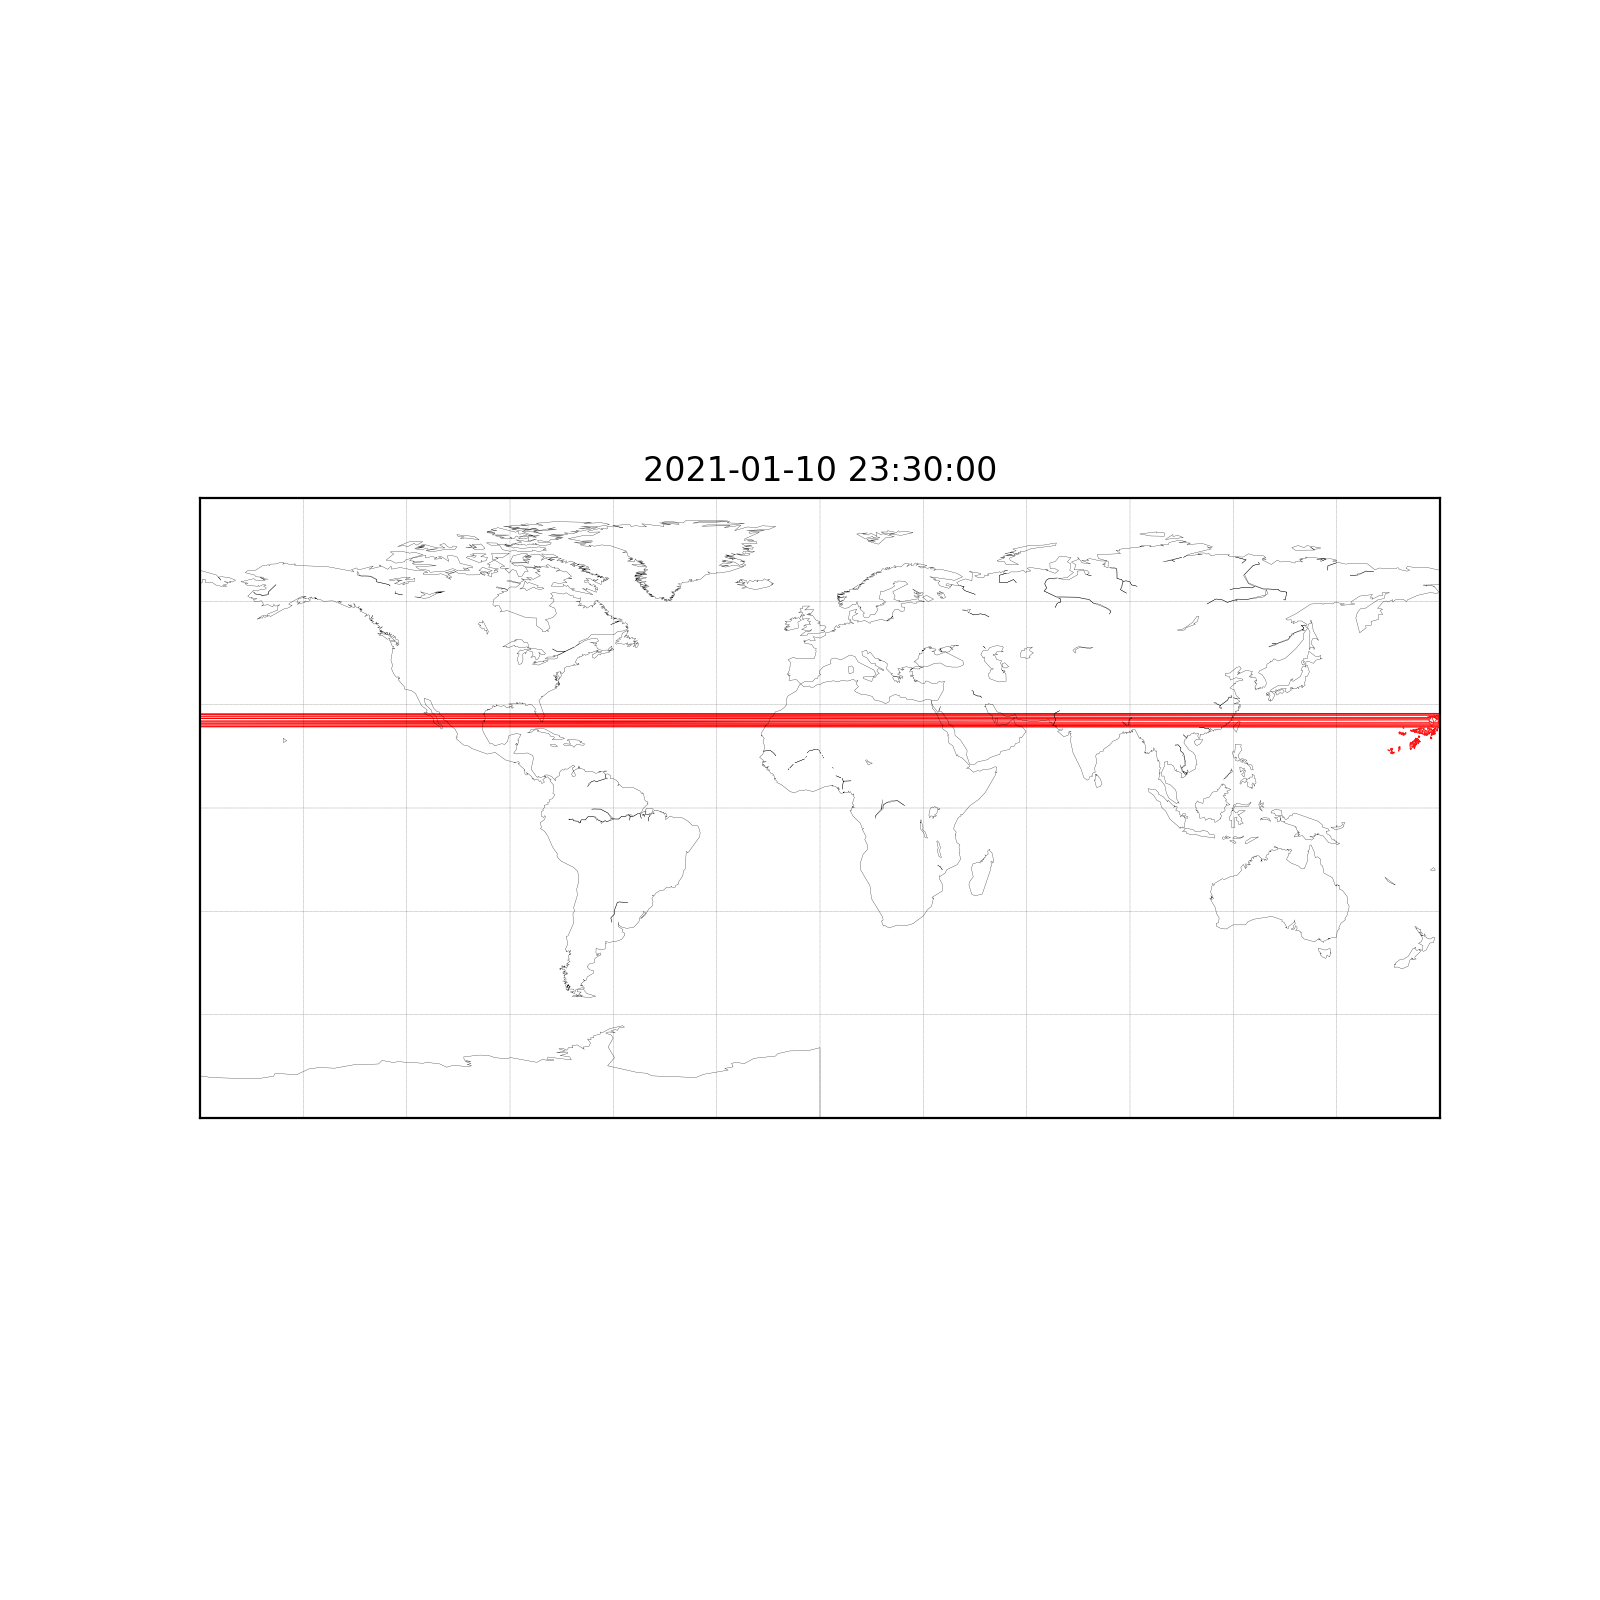

In [39]:
fig = plt.figure(figsize=(8, 8), dpi=200)
ax = fig.add_subplot(111)

m = Basemap(projection='cyl')
#m = Basemap(projection='moll', lon_0=-105)
#m = Basemap(projection='ortho', lon_0=-65, lat_0=-30, resolution='l')
#m = Basemap(projection='nsper', lon_0=-65, lat_0=-30, satellite_height=h*1000, resolution='l')

m.drawcoastlines(0.1)
m.drawparallels(numpy.arange(-90.,120.,30.), linewidth=0.1)
m.drawmeridians(numpy.arange(0, 360, 30), linewidth=0.1)

#m.fillcontinents(color='coral', lake_color='coral')
#m.drawlsmask(land_color = "#ddaa66", ocean_color="#7777ff", resolution = 'l')
#m.drawmapboundary(fill_color='aqua')

frames = []
for row in sdf.trixels:
    patches = []
    for subpoly in row.geoms:        
        patch = make_patch(subpoly, m)
        patches.append(patch)
    frames.append(patches)
    
frame = matplotlib.collections.PatchCollection(frames[0])
frame.set(edgecolor='red', linewidth=0.2, facecolor='white')
ax.add_collection(frame)

def animate(i):
    frame.set_paths(frames[i])
    ax.set_title(sdf.timestamp[i])
    
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(frames), interval=100, blit=False)

anim.save('animations/trixels.mp4', fps=10)
anim.save('animations/trixels.gif', fps=10)
plt.show()